***Final Team Project: Advanced Generative Chatbot Design***

**Group Name:** ENTROPY

**Group Members:**
1. Nitin Mishra
2. Puneet Chopra
3. Rohan Sharma

**Date:** October 2024

# Project Overview:

1. Goal: Build a chatbot that can carry out multi-turn conversations, adapt to context, and handle a variety of topics.
2. Output: A web or app interface where users can converse with the chatbot. (30 bonus points)

Pre-requisites:

Basic understanding of deep learning and neural networks.
Familiarity with a deep learning framework (e.g., TensorFlow, PyTorch).
Basic knowledge of web development (for the interface).
Phases:

# Research and Study Phase:

Study generative-based chatbot architectures like Seq2Seq, Transformers, and GPT and deep learning.
Understand the challenges of chatbot design: context management, coherency, handling ambiguous queries, etc.

# Data Collection and Preprocessing:

You can choose one of the following datasets:
Option 1: Dataset: Cornell Movie Dialogs CorpusLinks to an external site.
Preprocess data: tokenization, handling different languages (if applicable), and managing context.
Option 2: Dataset: Stanford Question AnsweringLinks to an external site.
Option 3: Dataset: Ubuntu Dialogue CorpusLinks to an external site.

# Model Design and Training:

Choose an architecture (e.g., Transformer-based models or deep learning models).
Implement or leverage existing implementations to train the model with the dataset.

# Evaluation:

Implement evaluation metrics.

# Data Set Selected : Cornell Movie Dialogue Corpus.

https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus

# Part 1 : Reading,Cleaning and merging the Data Files & EDA

# Step 1 : Reading the Files

In [35]:
import os

# Path to the folder where all the txt files are stored (use raw string or forward slashes)
folder_path = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB'

# List to store the filenames of the txt files
files_read = []

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Only process .txt files
        file_path = os.path.join(folder_path, filename)  # Full path to the file
        files_read.append(filename)  # Add the filename to the list
        print(f"Reading file: {filename}")  # Print the file name
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_content = file.read()  # Read file content
            print(f"Content of {filename}:\n")
            print(file_content[:500])  # Print the first 500 characters (or adjust as needed)
            print("\n" + "-"*80 + "\n")  # Separator between files

# Output the list of files read
print("List of files read:")

for file in files_read:
    print(file)

Reading file: movie_characters_metadata.txt
Content of movie_characters_metadata.txt:

u0 +++$+++ BIANCA +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ f +++$+++ 4
u1 +++$+++ BRUCE +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ ? +++$+++ ?
u2 +++$+++ CAMERON +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ m +++$+++ 3
u3 +++$+++ CHASTITY +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ ? +++$+++ ?
u4 +++$+++ JOEY +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ m +++$+++ 6
u5 +++$+++ KAT +++$+++ m0 +++$+++ 10 things i hate about you +++$+++ f +++$+++ 2

--------------------------------------------------------------------------------

Reading file: movie_conversations.txt
Content of movie_conversations.txt:

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']
u0 +++$+++ u2 

#  Step 2 : Cleaning the Files

In [36]:
import pandas as pd

# Define the correct separator and encoding
separator = r'\s\+\+\+\$\+\+\+\s'
encoding = 'ISO-8859-1'
engine = 'python'

# Base directory for the files
base_path = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB'

def load_movie_titles(file_path):
    """Load and process the movie titles metadata."""
    movie_titles = pd.read_csv(file_path, sep=separator, engine=engine, header=None, encoding=encoding)
    movie_titles.columns = ['movieID', 'movie_title', 'movie_year', 'IMDB_rating', 'IMDB_votes', 'genres']
    print("Movie Titles Metadata:")
    print(movie_titles.head())
    return movie_titles

def load_movie_characters(file_path):
    """Load and process the movie characters metadata."""
    movie_characters = pd.read_csv(file_path, sep=separator, engine=engine, header=None, encoding=encoding)
    movie_characters.columns = ['characterID', 'character_name', 'movieID', 'movie_title', 'gender', 'position_in_credits']
    print("Movie Characters Metadata:")
    print(movie_characters.head())
    return movie_characters

def load_movie_lines(file_path):
    """Load and process the movie lines data."""
    movie_lines = pd.read_csv(file_path, sep=separator, engine=engine, header=None, encoding=encoding)
    movie_lines.columns = ['lineID', 'characterID', 'movieID', 'character_name', 'text']
    print("Movie Lines:")
    print(movie_lines.head())
    return movie_lines

def load_movie_conversations(file_path):
    """Load and process the movie conversations data."""
    movie_conversations = pd.read_csv(file_path, sep=separator, engine=engine, header=None, encoding=encoding)
    movie_conversations.columns = ['charID_1', 'charID_2', 'movieID', 'utterance_list']
    print("Movie Conversations:")
    print(movie_conversations.head())
    return movie_conversations

# File paths for each data file
movie_titles_file = f'{base_path}\\movie_titles_metadata.txt'
movie_characters_file = f'{base_path}\\movie_characters_metadata.txt'
movie_lines_file = f'{base_path}\\movie_lines.txt'
movie_conversations_file = f'{base_path}\\movie_conversations.txt'

# Load each file using the functions
movie_titles = load_movie_titles(movie_titles_file)
movie_characters = load_movie_characters(movie_characters_file)
movie_lines = load_movie_lines(movie_lines_file)
movie_conversations = load_movie_conversations(movie_conversations_file)

Movie Titles Metadata:
  movieID                 movie_title movie_year  IMDB_rating  IMDB_votes  \
0      m0  10 things i hate about you       1999          6.9       62847   
1      m1  1492: conquest of paradise       1992          6.2       10421   
2      m2                  15 minutes       2001          6.1       25854   
3      m3       2001: a space odyssey       1968          8.4      163227   
4      m4                     48 hrs.       1982          6.9       22289   

                                              genres  
0                              ['comedy', 'romance']  
1     ['adventure', 'biography', 'drama', 'history']  
2           ['action', 'crime', 'drama', 'thriller']  
3                 ['adventure', 'mystery', 'sci-fi']  
4  ['action', 'comedy', 'crime', 'drama', 'thrill...  
Movie Characters Metadata:
  characterID character_name movieID                 movie_title gender  \
0          u0         BIANCA      m0  10 things i hate about you      f   
1      

# Step 3 : Saving the Cleaned Files

In [37]:
# Define output file paths for each DataFrame
movie_titles_output = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_titles_metadata_cleaned.csv'
movie_characters_output = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_characters_metadata_cleaned.csv'
movie_lines_output = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_lines_cleaned.csv'
movie_conversations_output = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_conversations_cleaned.csv'

# Save each DataFrame as a CSV file
movie_titles.to_csv(movie_titles_output, index=False)
print(f"Movie Titles Metadata saved to '{movie_titles_output}'")

movie_characters.to_csv(movie_characters_output, index=False)
print(f"Movie Characters Metadata saved to '{movie_characters_output}'")

movie_lines.to_csv(movie_lines_output, index=False)
print(f"Movie Lines saved to '{movie_lines_output}'")

movie_conversations.to_csv(movie_conversations_output, index=False)
print(f"Movie Conversations saved to '{movie_conversations_output}'")

Movie Titles Metadata saved to 'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_titles_metadata_cleaned.csv'
Movie Characters Metadata saved to 'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_characters_metadata_cleaned.csv'
Movie Lines saved to 'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_lines_cleaned.csv'
Movie Conversations saved to 'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_conversations_cleaned.csv'


# Step 4 : Merging the Cleaned files to a single data set for EDA

In [38]:
import pandas as pd
import ast

# Define file paths
movie_titles_file = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_titles_metadata_cleaned.csv'
movie_characters_file = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_characters_metadata_cleaned.csv'
movie_lines_file = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_lines_cleaned.csv'
movie_conversations_file = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\movie_conversations_cleaned.csv'

# Load each file
movie_titles = pd.read_csv(movie_titles_file)
movie_characters = pd.read_csv(movie_characters_file)
movie_lines = pd.read_csv(movie_lines_file)
movie_conversations = pd.read_csv(movie_conversations_file)

# Step 1: Merge movie_lines with movie_characters on characterID and movieID
lines_characters = pd.merge(movie_lines, movie_characters, on=['characterID', 'movieID'], how='left')

# Step 2: Prepare movie_conversations for merging by expanding lineIDs
movie_conversations['utterance_list'] = movie_conversations['utterance_list'].apply(ast.literal_eval)
movie_conversations_exploded = movie_conversations.explode('utterance_list').rename(columns={'utterance_list': 'lineID'})

# Merge conversations with lines_characters on lineID and movieID
conversations_with_lines = pd.merge(movie_conversations_exploded, lines_characters, on=['lineID', 'movieID'], how='left')

# Step 3: Merge conversations_with_lines with movie_titles on movieID
final_merged_data = pd.merge(conversations_with_lines, movie_titles, on='movieID', how='left')

# Step 4: Clean up duplicate columns and rename for clarity
final_merged_data = final_merged_data.drop(columns=['character_name_y', 'movie_title_y'])
final_merged_data = final_merged_data.rename(columns={
    'character_name_x': 'character_name',
    'movie_title_x': 'movie_title'
})

# Preview the cleaned DataFrame
print("Cleaned Final Merged Data:")
print(final_merged_data.head())

# Save the cleaned final merged DataFrame
cleaned_output_path = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset.csv'
final_merged_data.to_csv(cleaned_output_path, index=False)
print(f"Cleaned final combined dataset saved to '{cleaned_output_path}'")

Cleaned Final Merged Data:
  charID_1 charID_2 movieID lineID characterID character_name  \
0       u0       u2      m0   L194          u0         BIANCA   
1       u0       u2      m0   L195          u2        CAMERON   
2       u0       u2      m0   L196          u0         BIANCA   
3       u0       u2      m0   L197          u2        CAMERON   
4       u0       u2      m0   L198          u0         BIANCA   

                                                text  \
0  Can we make this quick?  Roxanne Korrine and A...   
1  Well, I thought we'd start with pronunciation,...   
2  Not the hacking and gagging and spitting part....   
3  Okay... then how 'bout we try out some French ...   
4  You're asking me out.  That's so cute. What's ...   

                  movie_title gender position_in_credits movie_year  \
0  10 things i hate about you      f                   4       1999   
1  10 things i hate about you      m                   3       1999   
2  10 things i hate about you   

# Step 5 :  EDA on the final_cleaned_combined_chatbot_dataset.csv'

#  EDA 1 : Genre Distribution

Genre Distribution:
          Genre   Count
4         drama  172557
8      thriller  124082
0        comedy   94575
1       romance   77518
7         crime   75435
6        action   70257
9       mystery   51662
10       sci-fi   48309
2     adventure   47175
12       horror   37088
11      fantasy   31290
3     biography   14021
15          war    9901
5       history    7854
13        music    7494
18    animation    6763
20       family    6622
14      western    6165
19        sport    4476
17      musical    3061
22    film-noir    2190
23  documentary    1458
21        short    1423
16        adult     306


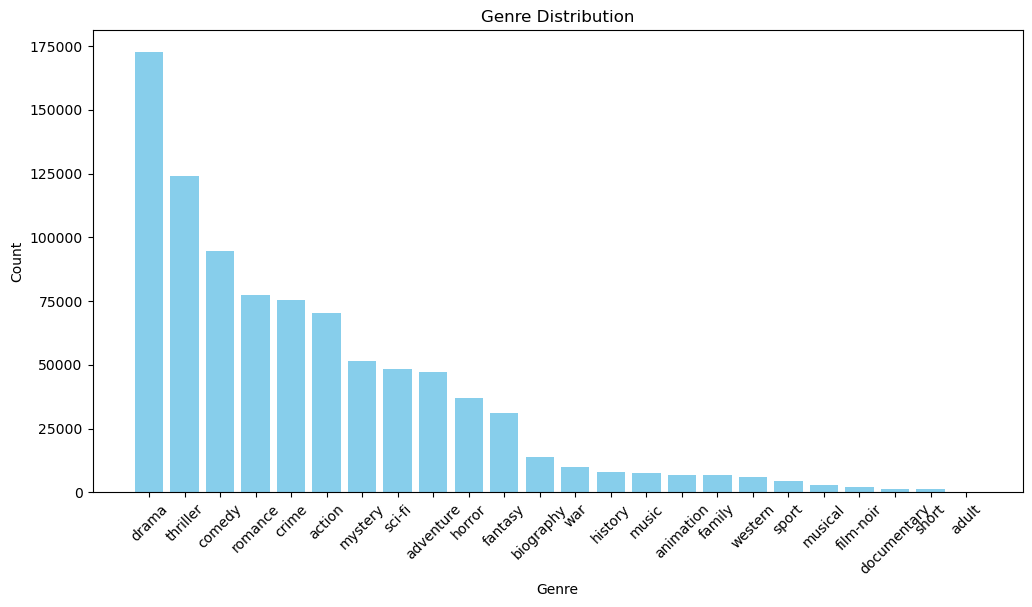

In [39]:
import pandas as pd

# Load the final cleaned dataset
df = pd.read_csv(r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset.csv')

# Extract and count genre occurrences
from collections import Counter
import ast

# Convert the 'genres' string representation of lists into actual lists
df['genres'] = df['genres'].apply(ast.literal_eval)

# Flatten the list of genres and count occurrences
genre_list = [genre for genres in df['genres'] for genre in genres]
genre_counts = Counter(genre_list)

# Convert to DataFrame for easy visualization
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Display the genre distribution
print("Genre Distribution:")
print(genre_counts_df)

# Optional: Plot the genre distribution for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# EDA 2 : Character Analysis

Top 10 Most Frequent Characters:
character_name
JACK       3032
JOE        1897
GEORGE     1748
FRANK      1537
NICK       1484
HARRY      1480
SAM        1475
JOHN       1407
PETER      1395
MICHAEL    1265
Name: count, dtype: int64

Standardized Gender Distribution:
gender
m          170768
f           71255
unknown     62690
Name: count, dtype: int64


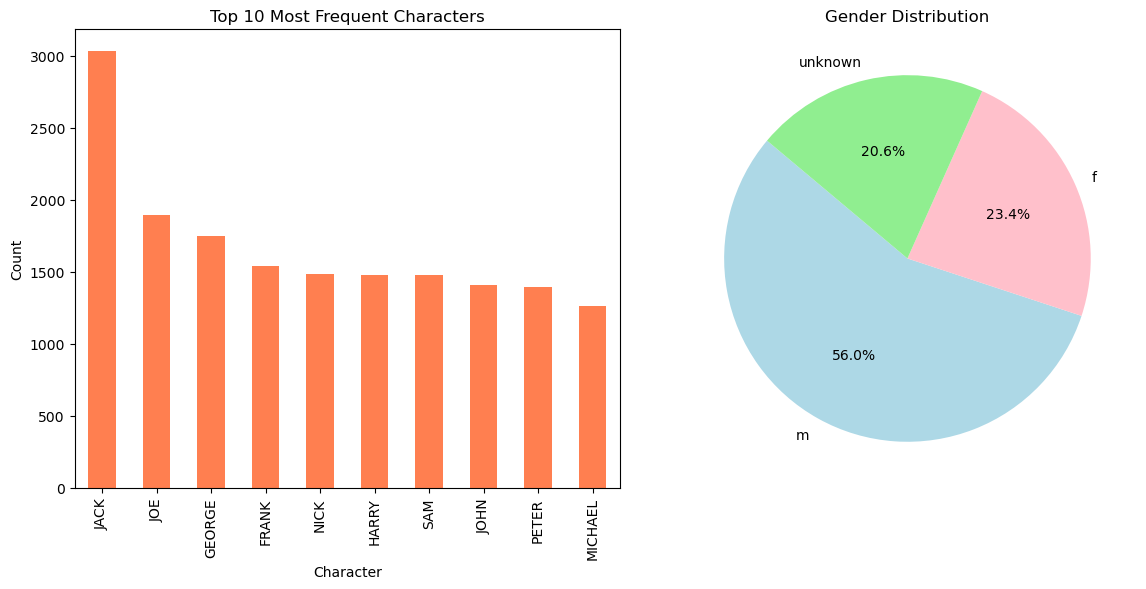

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the final cleaned dataset
df = pd.read_csv(r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset.csv')

# Standardize gender tags: replace 'M' with 'm', 'F' with 'f', and '?' with 'unknown'
df['gender'] = df['gender'].replace({'M': 'm', 'F': 'f', '?': 'unknown'})

# Count the most frequent characters
character_counts = df['character_name'].value_counts()

# Display the top 10 most frequent characters
print("Top 10 Most Frequent Characters:")
print(character_counts.head(10))

# Gender distribution
gender_counts = df['gender'].value_counts()

# Display the gender distribution
print("\nStandardized Gender Distribution:")
print(gender_counts)

# Optional: Plot the character and gender distribution for visualization
plt.figure(figsize=(12, 6))

# Character Frequency
plt.subplot(1, 2, 1)
character_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Characters')
plt.xlabel('Character')
plt.ylabel('Count')

# Gender Distribution
plt.subplot(1, 2, 2)
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


#  EDA 3 : Dialogue Length Analysis

Top 10 Characters by Average Dialogue Length:
character_name
WOLTZ                                                   72.333333
WICHITA                                            ]    64.250000
NEWCOMBE                                                62.000000
DAITZ                                                   60.400000
ALLEGRO                                                 60.000000
CAULAINCOURT                                            52.250000
ANNA'S FATHER                                           50.500000
THE COUNTESS                                            49.100000
MR. SCHARLACH                                           48.666667
SIR WILLIAM                                             47.272727
Name: dialogue_length, dtype: float64

Top 10 Movies by Average Dialogue Length:
movie_title
soldier                        35.769231
even cowgirls get the blues    26.165563
the jazz singer                22.307692
jfk                            21.554054
barry lyndon          

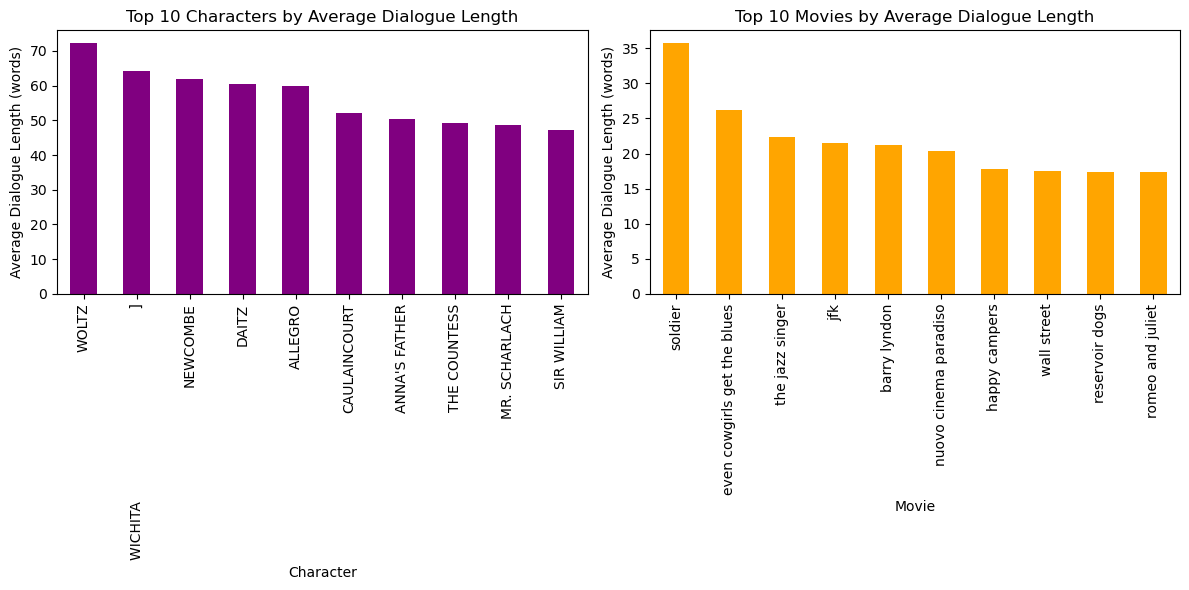

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset.csv')

# Calculate the length of each line in terms of word count
df['dialogue_length'] = df['text'].fillna('').apply(lambda x: len(x.split()))

# Average dialogue length by character
avg_length_by_character = df.groupby('character_name')['dialogue_length'].mean().sort_values(ascending=False)

# Display the top 10 characters with the longest average dialogue
print("Top 10 Characters by Average Dialogue Length:")
print(avg_length_by_character.head(10))

# Average dialogue length by movie
avg_length_by_movie = df.groupby('movie_title')['dialogue_length'].mean().sort_values(ascending=False)

# Display the top 10 movies by average dialogue length
print("\nTop 10 Movies by Average Dialogue Length:")
print(avg_length_by_movie.head(10))

# Optional: Plot average dialogue length for characters and movies
plt.figure(figsize=(12, 6))

# Average Dialogue Length by Character
plt.subplot(1, 2, 1)
avg_length_by_character.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Characters by Average Dialogue Length')
plt.xlabel('Character')
plt.ylabel('Average Dialogue Length (words)')

# Average Dialogue Length by Movie
plt.subplot(1, 2, 2)
avg_length_by_movie.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Movies by Average Dialogue Length')
plt.xlabel('Movie')
plt.ylabel('Average Dialogue Length (words)')

plt.tight_layout()
plt.show()

# Step 6 : Data Cleaning Based on EDA

In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset.csv')

# Standardize gender labels
df['gender'] = df['gender'].replace({'M': 'm', 'F': 'f', '?': 'unknown'})

# Drop rows where text is NaN or empty
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != '']

# Replace '?' in character_name with 'unknown'
df['character_name'] = df['character_name'].replace('?', 'unknown')

# Drop rows with missing movie title or year, if these are critical fields
df = df.dropna(subset=['movie_title', 'movie_year'])

# Save the updated dataset
updated_output_path = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset_updated.csv'
df.to_csv(updated_output_path, index=False)
print(f"Updated dataset saved to '{updated_output_path}'")

Updated dataset saved to 'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset_updated.csv'


In [44]:
import pandas as pd

# Load the updated dataset
updated_file_path = r'D:\Nitin\MS - AAI\3. NLP\Team Project - Chatbot\Jupyter_based\Cornell_MDB\final_cleaned_combined_chatbot_dataset_updated.csv'
df_updated = pd.read_csv(updated_file_path)

# Display the first few rows of the updated DataFrame
df_updated.head()

,charID_1,charID_2,movieID,lineID,characterID,character_name,text,movie_title,gender,position_in_credits,movie_year,IMDB_rating,IMDB_votes,genres
0,u0,u2,m0,L194,u0,BIANCA,Can we make this quick? Roxanne Korrine and A...,10 things i hate about you,f,4,1999,6.9,62847,"['comedy', 'romance']"
1,u0,u2,m0,L195,u2,CAMERON,"Well, I thought we'd start with pronunciation,...",10 things i hate about you,m,3,1999,6.9,62847,"['comedy', 'romance']"
2,u0,u2,m0,L196,u0,BIANCA,Not the hacking and gagging and spitting part....,10 things i hate about you,f,4,1999,6.9,62847,"['comedy', 'romance']"
3,u0,u2,m0,L197,u2,CAMERON,Okay... then how 'bout we try out some French ...,10 things i hate about you,m,3,1999,6.9,62847,"['comedy', 'romance']"
4,u0,u2,m0,L198,u0,BIANCA,You're asking me out. That's so cute. What's ...,10 things i hate about you,f,4,1999,6.9,62847,"['comedy', 'romance']"


# Step 7 : Reconstructing the Conversations.

Approach to Create Conversations
Given the structured data, here’s the revised step-by-step process to accurately reconstruct conversations:

Load Each Dataset:

Load movie_lines.txt to create a dictionary mapping lineID to the text content.
Load movie_conversations.txt to use the lists of lineIDs, which outline the structure of each conversation.
Optionally, load movie_titles_metadata.txt and movie_characters_metadata.txt to add movie and character details later.
Reconstruct Conversations from movie_conversations.txt:

For each conversation, extract the lineIDs from the utterance_list field and look up their corresponding text in the movie_lines.txt data.
Arrange the text in sequence as per the lineID order in utterance_list.
Save the Conversations with Metadata:

Store each reconstructed conversation, along with metadata like the number of utterances (conversation_length), and potentially movieID, characterID of both participants, and additional movie or character details.

Summary of Challenges and Solutions:
Challenge: Reconstructing conversations accurately while preserving context.

Solution: Use the sequential lineIDs from movie_conversations.txt to maintain the conversation flow.
Challenge: Handling different conversation lengths.

Solution: Dynamically calculate and store the conversation length for each entry, allowing for flexible analysis later.
Challenge: Combining metadata for richer context in training.

Solution: Attach metadata from movie_titles_metadata.txt and movie_characters_metadata.txt after reconstructing the conversations.

In [2]:
import pandas as pd
import ast

# File paths
base_path = 'D:/Nitin/MS - AAI/3. NLP/Team Project - Chatbot/Jupyter_based/Cornell_MDB'
lines_file = f'{base_path}/movie_lines_cleaned.csv'
conversations_file = f'{base_path}/movie_conversations_cleaned.csv'
titles_file = f'{base_path}/movie_titles_metadata_cleaned.csv'
characters_file = f'{base_path}/movie_characters_metadata_cleaned.csv'

# Load datasets
movie_lines = pd.read_csv(lines_file)
movie_conversations = pd.read_csv(conversations_file)
movie_titles = pd.read_csv(titles_file)
movie_characters = pd.read_csv(characters_file)

# Convert line IDs in utterance_list to lists
movie_conversations['utterance_list'] = movie_conversations['utterance_list'].apply(ast.literal_eval)

# Create a dictionary to map lineID to the text
line_dict = pd.Series(movie_lines.text.values, index=movie_lines.lineID).to_dict()

# Reconstruct each conversation
conversation_texts = []
conversation_metadata = []

for idx, row in movie_conversations.iterrows():
    # Extract character IDs and movie ID
    charID_1 = row['charID_1']
    charID_2 = row['charID_2']
    movieID = row['movieID']
    
    # Get all the text for the line IDs in this conversation, filtering out non-string values
    conversation = [line_dict[line_id] for line_id in row['utterance_list'] if line_id in line_dict and isinstance(line_dict[line_id], str)]
    conversation_text = ' '.join(conversation)
    
    # Store the conversation and metadata
    conversation_texts.append(conversation_text)
    conversation_metadata.append({
        'charID_1': charID_1,
        'charID_2': charID_2,
        'movieID': movieID,
        'conversation_length': len(conversation)
    })

# Convert to DataFrame for analysis and saving
conversation_df = pd.DataFrame(conversation_metadata)
conversation_df['conversation_text'] = conversation_texts

# Save to CSV for further processing
output_file_path = f'{base_path}/reconstructed_conversations_with_metadata.csv'
conversation_df.to_csv(output_file_path, index=False)
print(f"Reconstructed conversations saved to '{output_file_path}'")

Reconstructed conversations saved to 'D:/Nitin/MS - AAI/3. NLP/Team Project - Chatbot/Jupyter_based/Cornell_MDB/reconstructed_conversations_with_metadata.csv'


In [3]:
# Display the head of the dataset
conversation_df.head()

,charID_1,charID_2,movieID,conversation_length,conversation_text
0,u0,u2,m0,4,Can we make this quick? Roxanne Korrine and A...
1,u0,u2,m0,2,You're asking me out. That's so cute. What's ...
2,u0,u2,m0,4,"No, no, it's my fault -- we didn't have a prop..."
3,u0,u2,m0,3,Why? Unsolved mystery. She used to be really ...
4,u0,u2,m0,2,"Gosh, if only we could find Kat a boyfriend......"


# Step 8 : Including context in the conversations.

# 1. Including Context in Conversations for Enhanced Chatbot Training
1. Handling Speaker Changes
Use speaker tokens to mark transitions between speakers, indicating when each character is speaking.
Assign tokens based on charID to maintain continuity in conversation and distinguish who is speaking.
2. Adding Character Names, Genders, and Movie Titles
Character Information: Include character names and genders to add a more personalized feel to the dialogue.
Movie Title: Prepend each conversation with the movie title to help the model understand the context of the dialogue.
# 3. Incorporating Additional Metadata
Genres: Adding genres helps the model understand the tone and style of the movie, such as Comedy, Romance, or Drama.
Movie Year: Provides temporal context, which could influence the language style and cultural references within the conversation.
IMDB Rating: This optional metadata could suggest the popularity or general quality of the movie.
# 4. Creating Contextual Conversation Sequences
Prepend each conversation with a metadata header that includes the movie title, genre, year, and other relevant information.
Add speaker-specific metadata (name and gender) before each line in a conversation, enhancing the chatbot's understanding of character context.
# 5. Implementation Strategy
Modify Conversation Creation Code: Update the existing code to include these context tokens and metadata in each conversation sequence.
Tokenization: Tokenize the enhanced conversation sequences with the added context, ensuring compatibility for model training.
Training: Use the enriched data to train the chatbot model, enabling it to generate more context-aware responses.
Including these contextual elements in the training data allows the chatbot to better understand conversation dynamics, recognize characters, and respond more accurately based on the overall setting of each dialogue. This approach will enhance the relevance and quality of the chatbot's responses in various conversational contexts.

In [15]:
import pandas as pd
import ast

# Define file paths for the cleaned data files
base_path = 'D:/Nitin/MS - AAI/3. NLP/Team Project - Chatbot/Jupyter_based/Cornell_MDB'
characters_file = f'{base_path}/movie_characters_metadata_cleaned.csv'
titles_file = f'{base_path}/movie_titles_metadata_cleaned.csv'
lines_file = f'{base_path}/movie_lines_cleaned.csv'
conversations_file = f'{base_path}/movie_conversations_cleaned.csv'
output_path = f'{base_path}/enriched_conversations_with_context.csv'

# Load the necessary files
characters_df = pd.read_csv(characters_file)
titles_df = pd.read_csv(titles_file)
lines_df = pd.read_csv(lines_file)
conversations_df = pd.read_csv(conversations_file)

# Clean up gender in characters metadata
def clean_gender(gender):
    gender = str(gender).lower()
    if gender in ['m', 'male']:
        return 'male'
    elif gender in ['f', 'female']:
        return 'female'
    elif gender == '?':
        return 'unknown'
    else:
        return 'unknown'

characters_df['gender'] = characters_df['gender'].apply(clean_gender)

# Convert utterance list from string representation of lists to actual lists
conversations_df['utterance_list'] = conversations_df['utterance_list'].apply(ast.literal_eval)

# Create a dictionary to map lineID to the text, converting any non-string values to empty strings
line_dict = {line_id: str(text) if isinstance(text, str) else "" for line_id, text in zip(lines_df['lineID'], lines_df['text'])}

# Function to retrieve conversation text with context
def create_conversation_with_context(row):
    # Movie context
    movie_context = f"<movie: {row['movie_title']} ({row['movie_year']})> <genre: {', '.join(ast.literal_eval(row['genres']))}>"
    
    # Speaker context
    char1_context = f"<speaker1: {row['charID_1_name']} ({row['charID_1_gender']})>"
    char2_context = f"<speaker2: {row['charID_2_name']} ({row['charID_2_gender']})>"
    
    # Concatenate all context information
    conversation_context = f"{movie_context} {char1_context} {char2_context}\n\n"
    
    # Initialize the conversation text with context
    conversation_text_with_context = conversation_context
    
    # Generate the conversation text by alternating speakers
    line_ids = row['utterance_list']
    for i, line_id in enumerate(line_ids):
        if line_id in line_dict:
            # Determine the speaker and their gender based on the turn
            speaker = row['charID_1_name'] if i % 2 == 0 else row['charID_2_name']
            gender = row['charID_1_gender'] if i % 2 == 0 else row['charID_2_gender']
            # Format speaker context and add the line to the conversation text
            speaker_context = f"<{speaker} ({gender})>: " + line_dict[line_id]
            conversation_text_with_context += speaker_context + "\n"

    return conversation_text_with_context

# Merge the conversations data with character and movie details
merged_df = conversations_df.merge(
    characters_df, left_on=['charID_1', 'movieID'], right_on=['characterID', 'movieID'], suffixes=('_char1', '_char2')
).merge(
    characters_df, left_on=['charID_2', 'movieID'], right_on=['characterID', 'movieID'], suffixes=('_char1', '_char2')
).merge(
    titles_df, on='movieID', how='left'
)

# Clean up the merged DataFrame, renaming and dropping redundant columns
merged_df = merged_df.rename(columns={
    'character_name_char1': 'charID_1_name', 'gender_char1': 'charID_1_gender', 'position_in_credits_char1': 'charID_1_position_in_credits',
    'character_name_char2': 'charID_2_name', 'gender_char2': 'charID_2_gender', 'position_in_credits_char2': 'charID_2_position_in_credits',
    'movie_title': 'movie_title', 'movie_year': 'movie_year', 'IMDB_rating': 'IMDB_rating', 'IMDB_votes': 'IMDB_votes', 'genres': 'genres'
}).drop(columns=['characterID_char1', 'characterID_char2', 'charID_1', 'charID_2'])

# Apply the function to add context to each conversation
merged_df['conversation_text_with_context'] = merged_df.apply(create_conversation_with_context, axis=1)

# Save the enriched DataFrame with the updated context column
merged_df.to_csv(output_path, index=False)
print(f"Enriched conversations with context saved to '{output_path}'")

Enriched conversations with context saved to 'D:/Nitin/MS - AAI/3. NLP/Team Project - Chatbot/Jupyter_based/Cornell_MDB/enriched_conversations_with_context.csv'


In [17]:
# Display the head of the dataset
merged_df.head()

,movieID,utterance_list,charID_1_name,movie_title_char1,charID_1_gender,charID_1_position_in_credits,charID_2_name,movie_title_char2,charID_2_gender,charID_2_position_in_credits,movie_title,movie_year,IMDB_rating,IMDB_votes,genres,conversation_text_with_context
0,m0,"[L194, L195, L196, L197]",BIANCA,10 things i hate about you,female,4,CAMERON,10 things i hate about you,male,3,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",<movie: 10 things i hate about you (1999)> <ge...
1,m0,"[L198, L199]",BIANCA,10 things i hate about you,female,4,CAMERON,10 things i hate about you,male,3,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",<movie: 10 things i hate about you (1999)> <ge...
2,m0,"[L200, L201, L202, L203]",BIANCA,10 things i hate about you,female,4,CAMERON,10 things i hate about you,male,3,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",<movie: 10 things i hate about you (1999)> <ge...
3,m0,"[L204, L205, L206]",BIANCA,10 things i hate about you,female,4,CAMERON,10 things i hate about you,male,3,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",<movie: 10 things i hate about you (1999)> <ge...
4,m0,"[L207, L208]",BIANCA,10 things i hate about you,female,4,CAMERON,10 things i hate about you,male,3,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",<movie: 10 things i hate about you (1999)> <ge...


In [16]:
# Display a few sample conversations with context
sample_conversations = merged_df['conversation_text_with_context'].head(3)
print("Sample Conversations with Context:\n")
for i, conversation in enumerate(sample_conversations, 1):
    print(f"Conversation {i}:\n{conversation}\n{'-'*80}\n")

Sample Conversations with Context:

Conversation 1:
<movie: 10 things i hate about you (1999)> <genre: comedy, romance> <speaker1: BIANCA (female)> <speaker2: CAMERON (male)>

<BIANCA (female)>: Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
<CAMERON (male)>: Well, I thought we'd start with pronunciation, if that's okay with you.
<BIANCA (female)>: Not the hacking and gagging and spitting part.  Please.
<CAMERON (male)>: Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?

--------------------------------------------------------------------------------

Conversation 2:
<movie: 10 things i hate about you (1999)> <genre: comedy, romance> <speaker1: BIANCA (female)> <speaker2: CAMERON (male)>

<BIANCA (female)>: You're asking me out.  That's so cute. What's your name again?
<CAMERON (male)>: Forget it.

-------------------------------------------------------------------------------

# Summary of Processed Files for Chatbot Training

# Original TXT Files
These raw text files from the Cornell Movie Dialogues Corpus contain the foundational data:

movie_titles_metadata.txt: Contains metadata for movies, including title, year, IMDb rating, votes, and genres.
movie_characters_metadata.txt: Provides character details such as ID, name, movie association, gender, and position in credits.
movie_lines.txt: Holds individual dialogue lines linked to specific characters and movies.
movie_conversations.txt: Contains grouped conversations with line ID references, connecting lines into dialogue exchanges.
raw_script_urls.txt: Lists URLs for movie scripts (optional and used for reference).

# Cleaned CSV Files
After cleaning and formatting the original TXT files, the following CSV files were generated:

movie_titles_metadata_cleaned.csv: Cleaned movie metadata with standardized fields.
movie_characters_metadata_cleaned.csv: Character data with consistent gender labels and cleaned structure.
movie_lines_cleaned.csv: Dialogue lines mapped to characters and movies.
movie_conversations_cleaned.csv: Grouped conversations, formatted consistently for easy processing.
New Processed Files with Contextual Conversations
After refining the logic for constructing full conversations and embedding relevant context, we created additional datasets to enhance the model training process:

# Contextual Conversations Dataset
These datasets combine dialogue lines into full conversations, embedding detailed context such as movie metadata, speaker information, and conversation structure:

reconstructed_conversations_with_metadata.csv: Merged conversations with character and movie metadata, capturing conversation length and structure.
enriched_conversations_with_context.csv: This file includes the conversation text with embedded context:
Movie Metadata: Title, genre, year, IMDb rating, and votes.
Speaker Information: Character names, genders, and positions in credits.
Conversation Structure: Each line is prefixed with the speaker's name and gender, making the conversation flow clear and enhancing the model's understanding of speaker changes and dialogue context.
Final Contextual Conversation Column for Training
In this process, a single column named conversation_text_with_context was created in the enriched_conversations_with_context.csv file. This column includes the complete conversation with embedded context and is ready for direct use in model training. The format ensures that the model understands the context, speaker transitions, and dialogue flow.

# Summary
Cleaned Metadata Files: Smaller, focused files for movies, characters, and dialogue.
Combined Contextual Datasets:
reconstructed_conversations_with_metadata.csv: Merged conversation data with metadata.
enriched_conversations_with_context.csv: Enriched conversations with full context embedded, ready for multi-turn model training.
Enhanced Single Column for Training:
conversation_text_with_context: This column in the enriched dataset provides a contextually-rich format for efficient model training.
This updated approach, with embedded context, improves the chatbot's ability to maintain continuity and understand speaker dynamics within a conversation.

# Part 2 : # Tokenize conversation_text_with_context (Conversations with context)

In [18]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer
from tqdm import tqdm

# Load the enriched dataset
base_path = 'D:/Nitin/MS - AAI/3. NLP/Team Project - Chatbot/Jupyter_based/Cornell_MDB'
enriched_conversations_path = f'{base_path}/enriched_conversations_with_context.csv'
conversations_df = pd.read_csv(enriched_conversations_path)
print("Dataset loaded successfully.")

# Initialize the GPT-2 tokenizer
print("Initializing GPT-2 tokenizer...")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token for consistency
print("Tokenizer initialized. Padding token set to EOS token.")

# Set up lists to hold the tokenized data
input_ids_list = []
attention_masks_list = []

print("Starting tokenization of conversation text...")
# Tokenize each conversation text and store input IDs and attention masks
for i, text in tqdm(enumerate(conversations_df['conversation_text_with_context']), desc="Tokenizing conversations", total=len(conversations_df)):
    # Tokenize the text
    tokens = tokenizer.encode_plus(
        text,
        max_length=512,  # Limit to 512 tokens; adjust if needed based on memory capacity
        padding='max_length',  # Pad sequences to the max_length
        truncation=True,  # Truncate sequences longer than max_length
        return_tensors='pt'  # Return as PyTorch tensors
    )
    
    # Append to lists
    input_ids_list.append(tokens['input_ids'])
    attention_masks_list.append(tokens['attention_mask'])
    
    # Log every 10000th conversation for progress tracking
    if (i + 1) % 10000 == 0:
        print(f"Processed {i + 1} conversations...")

# Stack the tokenized tensors into final input IDs and attention masks tensors
print("Stacking tensors...")
input_ids = torch.cat(input_ids_list, dim=0)
attention_masks = torch.cat(attention_masks_list, dim=0)

# Print sample tensor outputs for verification
print("\nSample of the tokenized outputs:")
print("Sample input_ids:", input_ids[0])
print("Sample attention_mask:", attention_masks[0])

# Save the tensors for future training
tensor_save_path = f'{base_path}/tokenized_conversations_with_context.pt'
torch.save({'input_ids': input_ids, 'attention_masks': attention_masks}, tensor_save_path)
print(f"Tokenized data successfully saved to '{tensor_save_path}'")

Dataset loaded successfully.
Initializing GPT-2 tokenizer...
Tokenizer initialized. Padding token set to EOS token.
Starting tokenization of conversation text...


Tokenizing conversations:  12%|█▏        | 10090/83097 [00:13<01:32, 785.35it/s]

Processed 10000 conversations...


Tokenizing conversations:  24%|██▍       | 20114/83097 [00:26<01:21, 768.95it/s]

Processed 20000 conversations...


Tokenizing conversations:  36%|███▌      | 30117/83097 [00:39<01:02, 842.03it/s]

Processed 30000 conversations...


Tokenizing conversations:  48%|████▊     | 40080/83097 [00:52<00:54, 792.83it/s]

Processed 40000 conversations...


Tokenizing conversations:  60%|██████    | 50078/83097 [01:05<00:45, 727.63it/s]

Processed 50000 conversations...


Tokenizing conversations:  72%|███████▏  | 60132/83097 [01:18<00:26, 853.55it/s]

Processed 60000 conversations...


Tokenizing conversations:  84%|████████▍ | 70113/83097 [01:30<00:14, 887.45it/s]

Processed 70000 conversations...


Tokenizing conversations:  96%|█████████▋| 80091/83097 [01:43<00:04, 742.47it/s]

Processed 80000 conversations...


Tokenizing conversations: 100%|██████████| 83097/83097 [01:47<00:00, 773.89it/s]


Stacking tensors...

Sample of the tokenized outputs:
Sample input_ids: tensor([   27, 41364,    25,   838,  1243,  1312,  5465,   546,   345,   357,
        18946,     8,    29,  1279, 35850,    25, 10997,    11, 19661,    29,
         1279,  4125,  3110,    16,    25,   347, 16868,  8141,   357, 24724,
            8,    29,  1279,  4125,  3110,    17,    25, 32421,  1137,  1340,
          357, 22606,     8,    29,   198,   198,    27,  3483,  1565,  8141,
          357, 24724,     8, 31175,  1680,   356,   787,   428,  2068,    30,
          220, 34821, 21952, 14769,  7640,   290,  6858, 26971,   389,  1719,
          281,  8131, 42613,  1171,  2270,    12,   510,   319,   262, 15094,
           13,   220,  6521,    13,   198,    27,    34,  2390,  1137,  1340,
          357, 22606,     8, 31175,  3894,    11,   314,  1807,   356,  1549,
          923,   351, 41694,    11,   611,   326,   338,  8788,   351,   345,
           13,   198,    27,  3483,  1565,  8141,   357, 24724,     8,

# Define the Training Loop

# Saving the Fine-Tuned Model